```yaml
#%mldev nb_context

pipeline:
    - imports
    - draw_precision
    - draw_diversity
    - draw_novelty
    - draw_regret
```

In [16]:
import glob
import re

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

RESULT_PATH = 'results/c2ucb-improvement-experiment/49'


def get_metric_files(algorithm_name, metric_name, l, folds = [0, 1, 2, 3, 4, 5]):
    res = []
    for fold in folds:
        filepath = f'{RESULT_PATH}/algorithm:{algorithm_name}-l:{l}-fold:{fold}/{metric_name}.parquet'
        res.append(pd.read_parquet(filepath).reset_index(drop=False))
    res = pd.concat(res, ignore_index=True)
    res = res.groupby('round').mean().reset_index(drop=False)
    return res

#%mldev imports

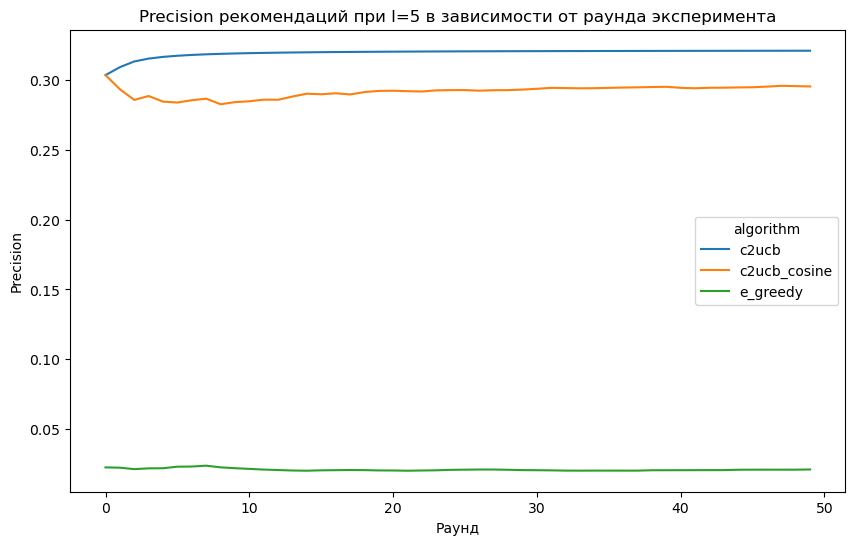

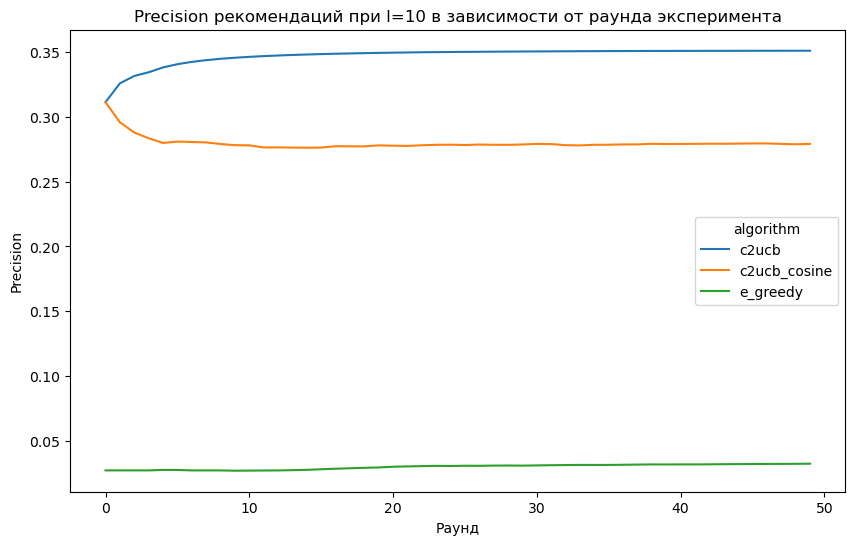

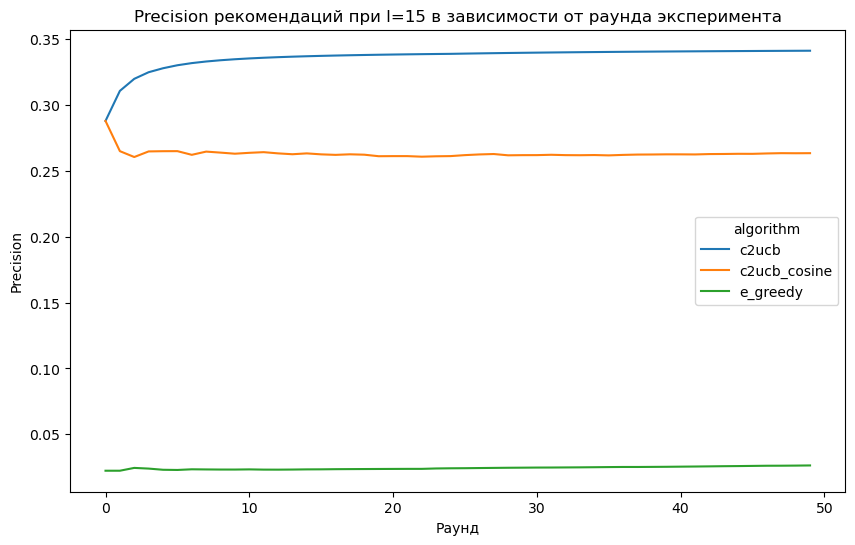

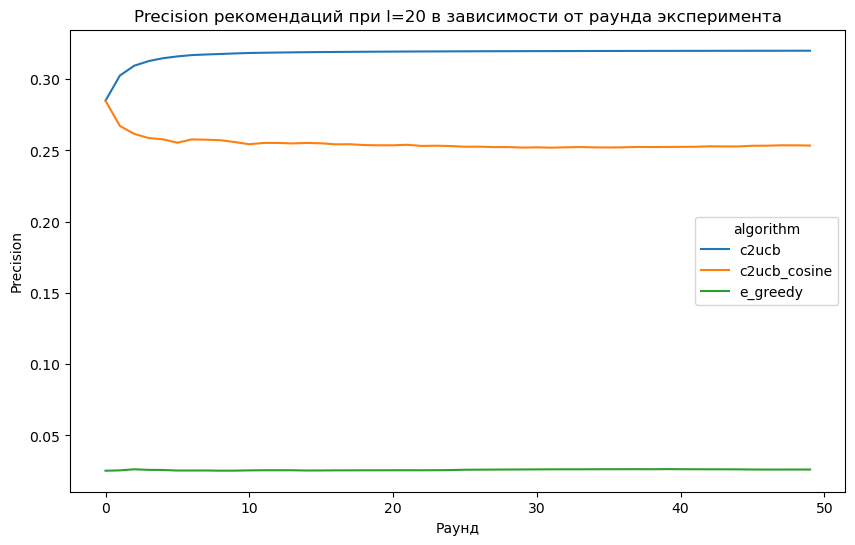

In [23]:
metric_name = 'precision'
algorithms = ['c2ucb', 'c2ucb_cosine', 'e_greedy']
ls = [5, 10, 15, 20]


for l in ls:
    algorithm_df = []
    for algorithm in algorithms:
        df = get_metric_files(algorithm, metric_name, l)
        df = df.reset_index()
        df['algorithm'] = algorithm
        algorithm_df.append(df)

    algorithm_df = pd.concat(algorithm_df, ignore_index=True)

    plt.figure(figsize=(10, 6))
    plt.xlabel('Раунд')
    plt.ylabel('Precision')
    plt.title(f'Precision рекомендаций при l={l} в зависимости от раунда эксперимента')
    
    sns.lineplot(data=algorithm_df, x='round', y='precision', hue='algorithm')
    plt.savefig(
        f"{RESULT_PATH}/charts/l:{l}_{metric_name}.png"
    )


#%mldev draw_precision

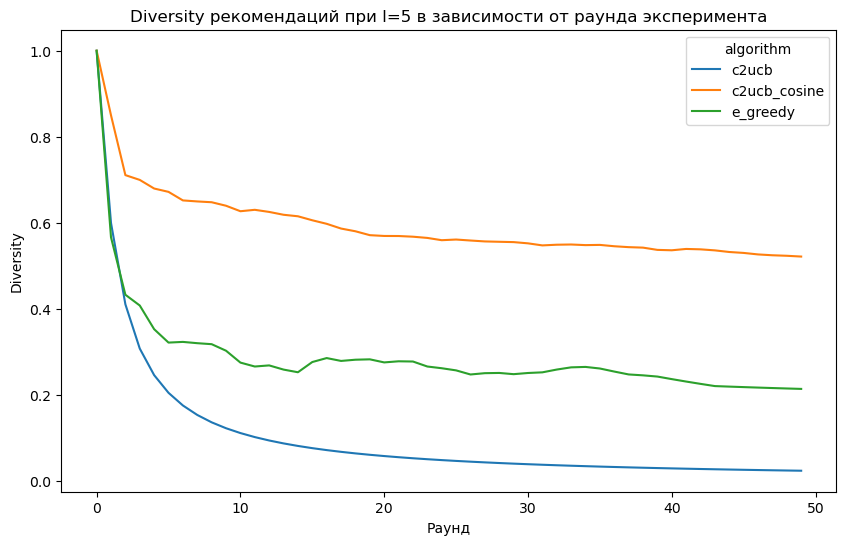

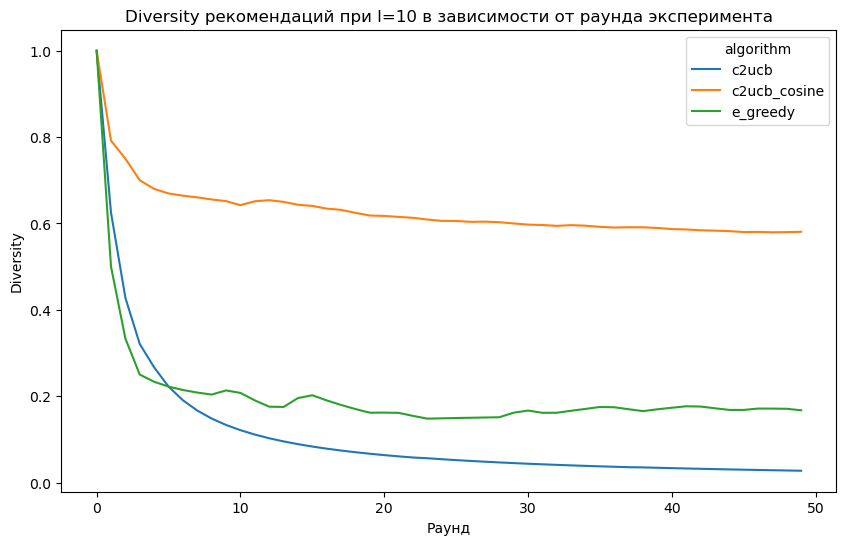

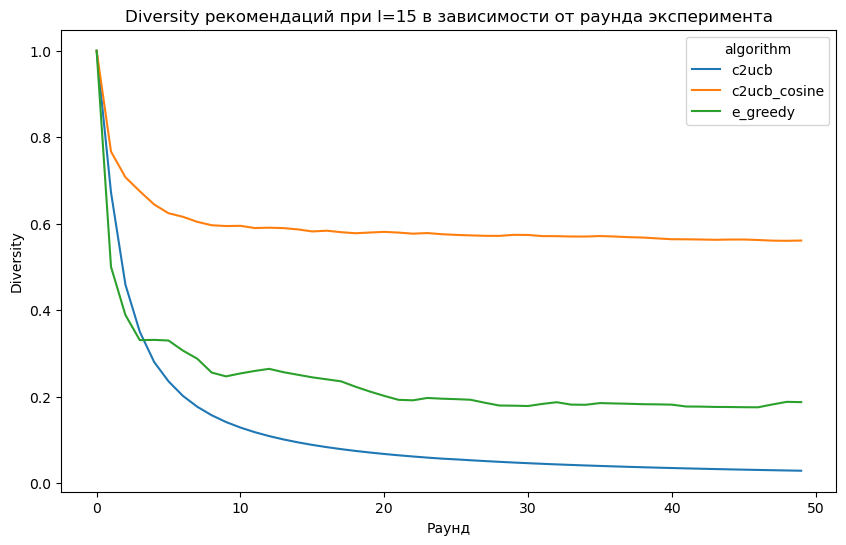

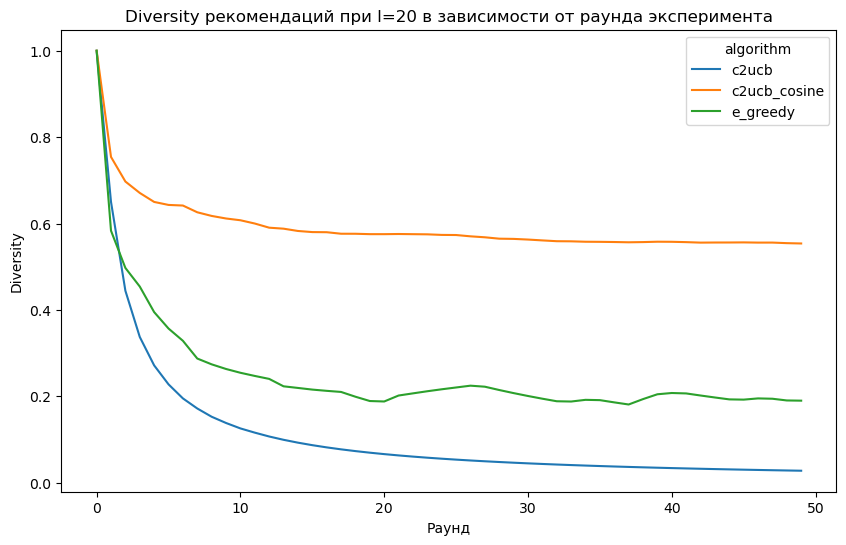

In [24]:
metric_name = 'diversity'
algorithms = ['c2ucb', 'c2ucb_cosine', 'e_greedy']
ls = [5, 10, 15, 20]


for l in ls:
    algorithm_df = []
    for algorithm in algorithms:
        df = get_metric_files(algorithm, metric_name, l)
        df = df.reset_index()
        df['algorithm'] = algorithm
        algorithm_df.append(df)

    algorithm_df = pd.concat(algorithm_df, ignore_index=True)

    plt.figure(figsize=(10, 6))
    plt.xlabel('Раунд')
    plt.ylabel('Diversity')
    plt.title(f'Diversity рекомендаций при l={l} в зависимости от раунда эксперимента')
    
    sns.lineplot(data=algorithm_df, x='round', y='diversity', hue='algorithm')
    plt.savefig(
        f"{RESULT_PATH}/charts/l:{l}_{metric_name}.png"
    )


#%mldev draw_diversity

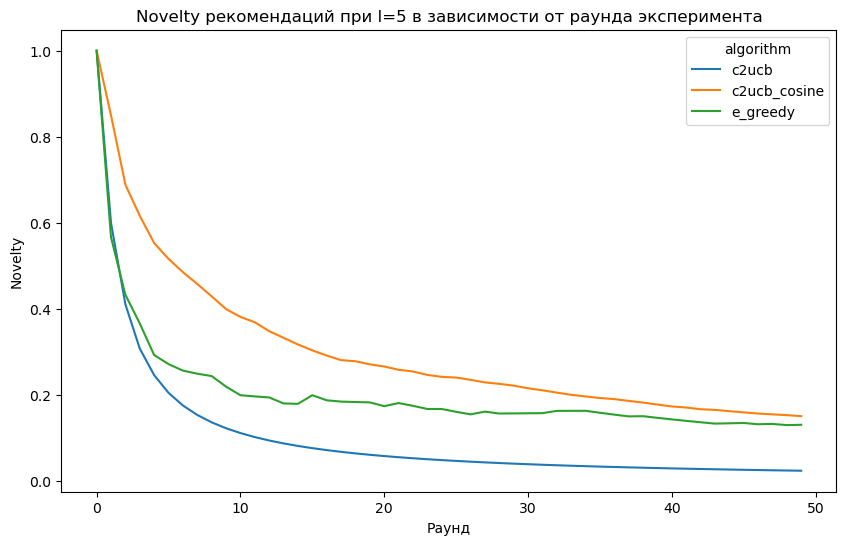

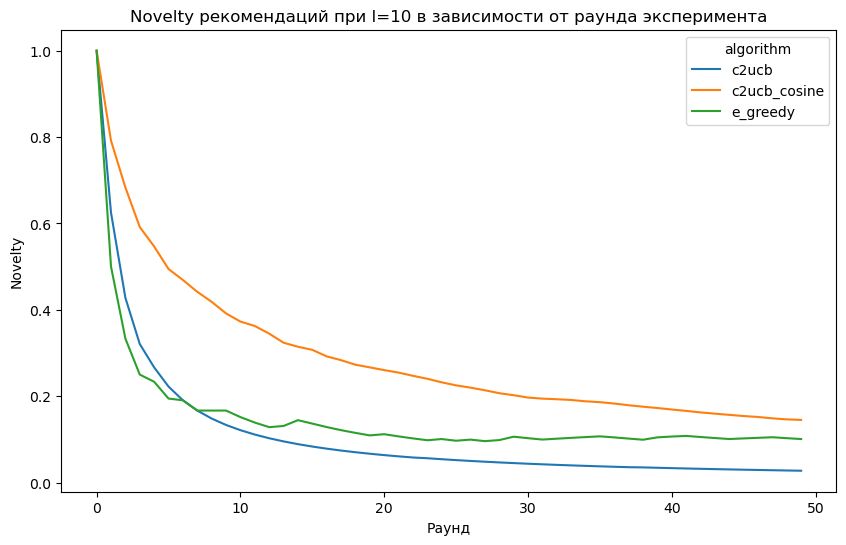

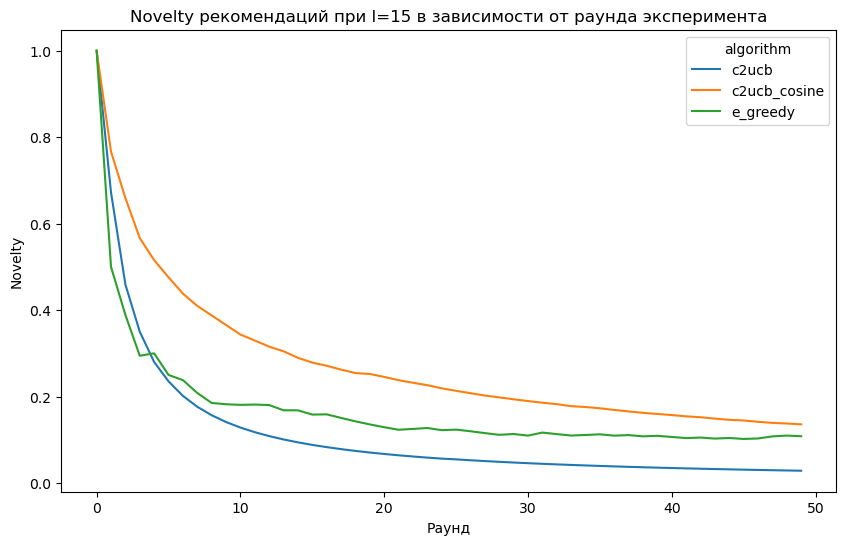

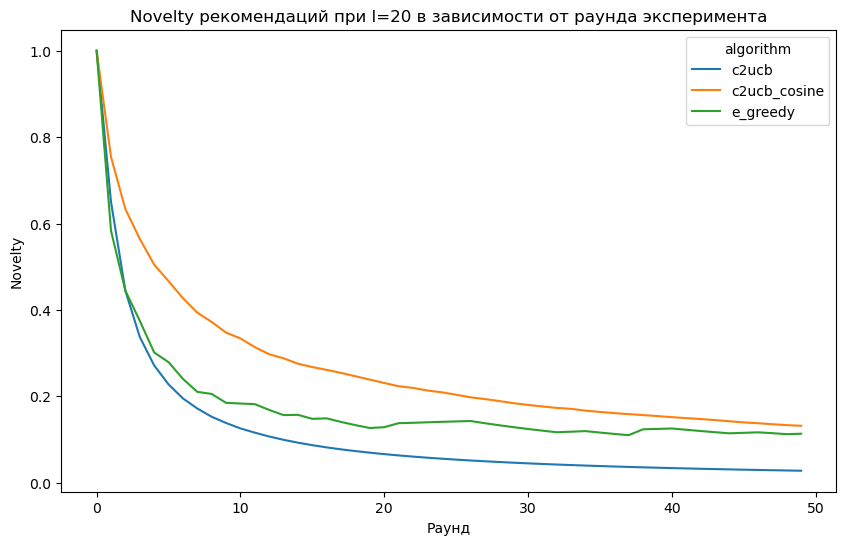

In [25]:
metric_name = 'novelty'
algorithms = ['c2ucb', 'c2ucb_cosine', 'e_greedy']
ls = [5, 10, 15, 20]


for l in ls:
    algorithm_df = []
    for algorithm in algorithms:
        df = get_metric_files(algorithm, metric_name, l)
        df = df.reset_index()
        df['algorithm'] = algorithm
        algorithm_df.append(df)

    algorithm_df = pd.concat(algorithm_df, ignore_index=True)

    plt.figure(figsize=(10, 6))
    plt.xlabel('Раунд')
    plt.ylabel('Novelty')
    plt.title(f'Novelty рекомендаций при l={l} в зависимости от раунда эксперимента')
    
    sns.lineplot(data=algorithm_df, x='round', y='novelty', hue='algorithm')
    plt.savefig(
        f"{RESULT_PATH}/charts/l:{l}_{metric_name}.png"
    )


#%mldev draw_novelty

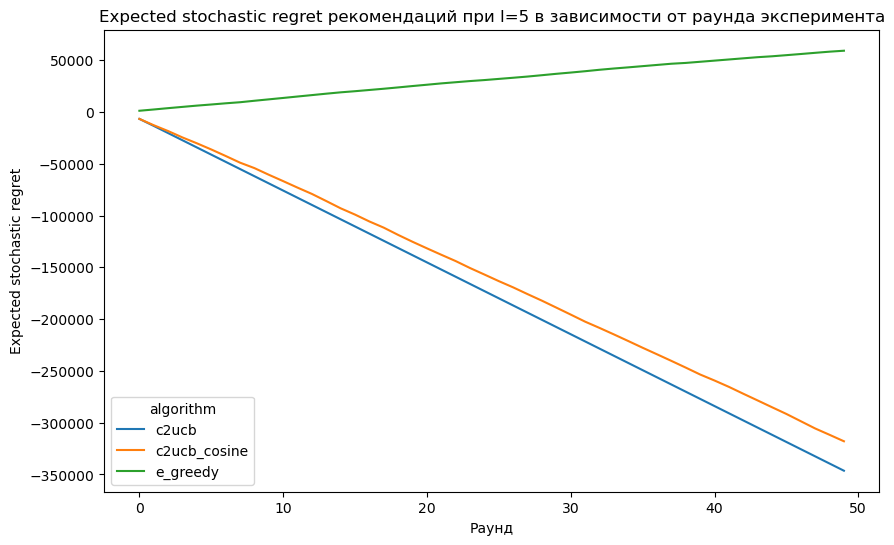

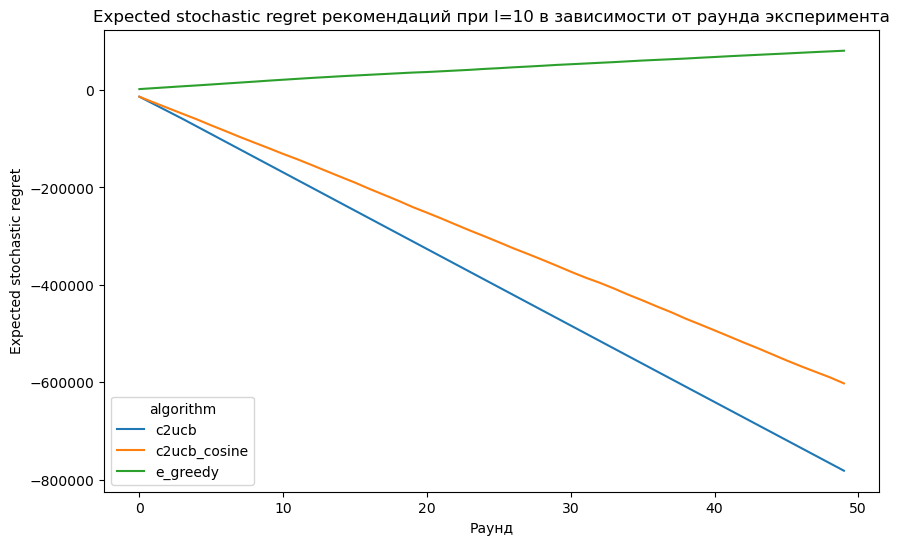

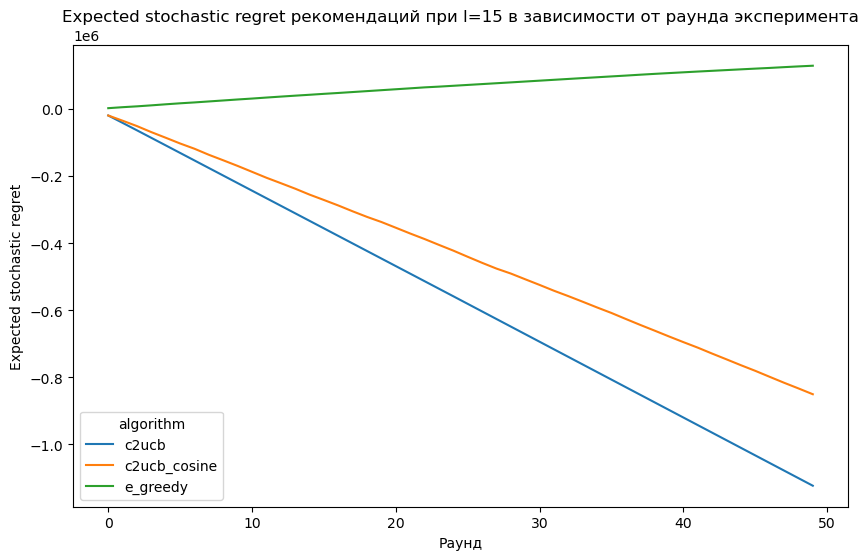

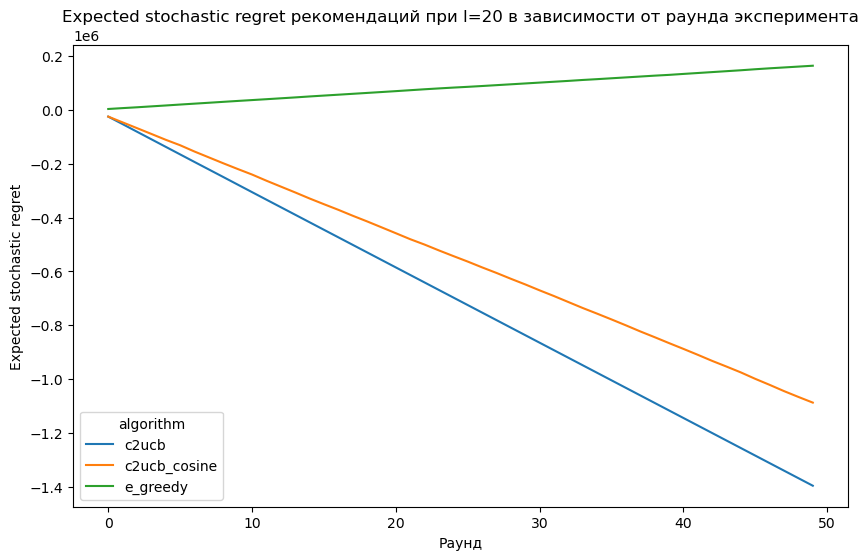

In [26]:
metric_name = 'expected_stochastic_regret'
algorithms = ['c2ucb', 'c2ucb_cosine', 'e_greedy']
ls = [5, 10, 15, 20]


for l in ls:
    algorithm_df = []
    for algorithm in algorithms:
        df = get_metric_files(algorithm, metric_name, l)
        df = df.reset_index()
        df['algorithm'] = algorithm
        algorithm_df.append(df)

    algorithm_df = pd.concat(algorithm_df, ignore_index=True)

    plt.figure(figsize=(10, 6))
    plt.xlabel('Раунд')
    plt.ylabel('Expected stochastic regret')
    plt.title(f'Expected stochastic regret рекомендаций при l={l} в зависимости от раунда эксперимента')
    
    sns.lineplot(data=algorithm_df, x='round', y='expected_stochastic_regret', hue='algorithm')
    plt.savefig(
        f"{RESULT_PATH}/charts/l:{l}_{metric_name}.png"
    )


#%mldev draw_regret